# Exploratory Data Analysis

- Long tail of labels

### Imports

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

In [237]:
# Load  data
data = pd.read_excel('../data/raw_data/Finansierade projekt.xlsx')

# Output first five rows
print(data.shape)
data.head(1)

data = data[['Title Sv','Title En','Description','Description En','Research fields']]


(1371, 12)


In [238]:
# Load SCB classifications & Preprocess

df_classifications = pd.read_excel('../data/raw_data/SCB_classifications.xlsx' ,  index_col=0)  # ,  index_col=0

df_classifications['Label_En'] = df_classifications['Label_En'].apply(lambda x: x.strip().lower())
df_classifications['Label_Sv'] = df_classifications['Label_Sv'].apply(lambda x: x.strip().lower())

# df_classifications.rename( columns={'Unnamed: 0':'ID'}, inplace=True)

# Analyse SCB classifications

In [239]:
# Calculate the number of digits for the class id that indicates the level of classification 
df_classifications['class_level'] = df_classifications.index.to_series().apply(lambda x: len(str(x)))

# Count the classes for each level
df_classifications['class_level'].value_counts()

5    260
3     42
1      6
Name: class_level, dtype: int64

In [240]:
df_classifications['joined_labels'] = df_classifications['Label_En'][df_classifications['class_level']== 1]

In [241]:
for index, row in df_classifications.iterrows():
    if row['class_level'] == 3:
        sub_index = int(str(index)[0])
        sub_label = df_classifications.loc[sub_index , 'joined_labels']
        df_classifications.loc[index, 'joined_labels'] = '; '.join([sub_label, row['Label_En']])

    if row['class_level'] == 5:
        sub_index = int(str(index)[0:3])
        sub_label = df_classifications.loc[sub_index , 'joined_labels']
        df_classifications.loc[index, 'joined_labels'] = '; '.join([sub_label, row['Label_En']])

In [242]:
# df_classifications.to_excel('../data/raw_data/SCB_classifications_joined.xlsx')  

# Split labels

In [243]:
data['Research fields'].apply(lambda x: len(x.split(';'))).value_counts()

3     287
6     248
7     222
5     217
8     181
4     130
9      85
10      1
Name: Research fields, dtype: int64

## Map data to corresponding SCB class

In [244]:
# from ..src.preprocessing.preprocessor import Preprocessor

# Preprocessor.get_matching_SCB_classification_ID


In [364]:

def get_matching_SCB_class_IDs(research_fields: str, df_classifications: pd.DataFrame) -> list(int):
    # retrieve class ID for all research fields'
    print(research_fields)
    if isinstance(research_fields, str):
        research_fields = research_fields.split('; ')  
        
        # Get unique research fields and normalise strings
        research_fields = list({" ".join(x.lower().strip().split()) for x in research_fields if x})
        
        class_IDs = list()
        # Match research field with given SCB classification and return classification with specific level, i.e. number of digits
        for field in research_fields:
            
            class_id = df_classifications.index[df_classifications['Label_En'] == field][:] 
            if not class_id.empty:
                class_IDs.extend(class_id.values[:])
            else:
                print(f"No matching classification found for {field}.")

        return class_IDs
    else:
        print(f"{research_fields} is not a string.")
        return None

TypeError: 'type' object is not iterable

In [246]:
get_matching_SCB_class_IDs(research_fields = data['Research fields'][0], df_classifications=df_classifications)

[5, 504, 50401, 50901, 509, 507, 50701]

In [247]:
data['Label_IDs'] = data['Research fields'].apply(lambda x: get_matching_SCB_class_IDs(x, df_classifications)) 

# Analysis long tail of label distribution in sample

In [297]:
all_IDs = pd.DataFrame([x for item in data['Label_IDs'] for x in item], columns = ['Label_IDs'])

,Label_IDs
0,5
1,504
2,50401
3,50901
4,509
...,...
7773,2
7774,207
7775,1
7776,10403


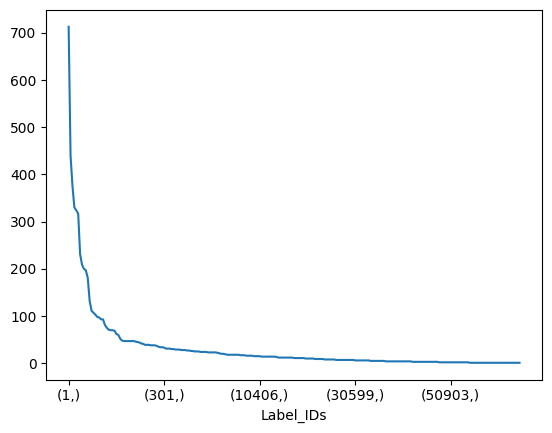

In [300]:
all_IDs.value_counts().plot()
all_IDs

Plot of all labels found with a classification level of 1. 6 labels were used out of 6 possible ones.


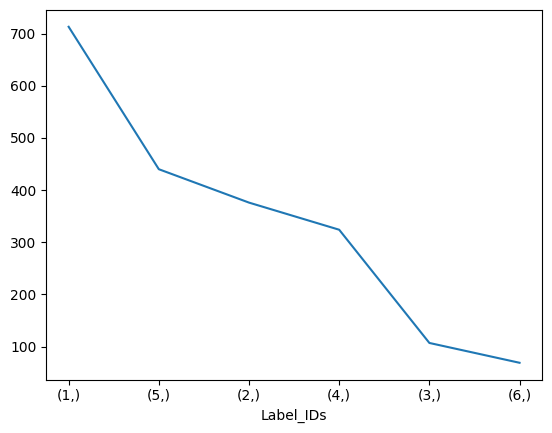

Plot of all labels found with a classification level of 3. 42 labels were used out of 42 possible ones.


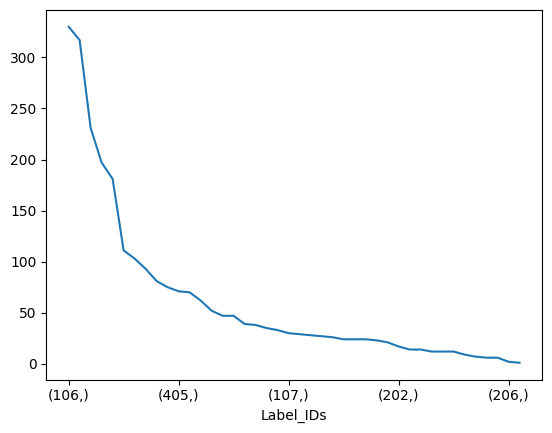

Plot of all labels found with a classification level of 5. 189 labels were used out of 260 possible ones.


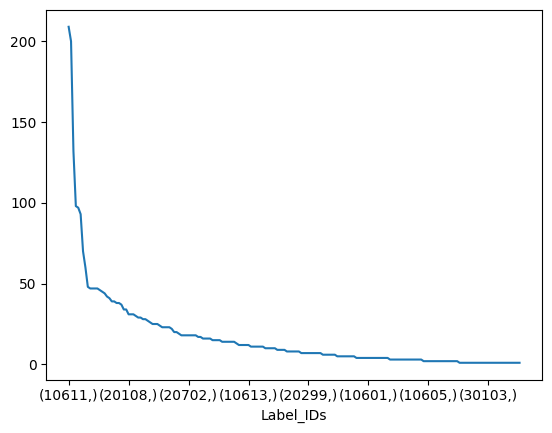

In [359]:
# Filter the DataFrame to only include values with a length of 3

for i, all_label in zip([1,3,5], [6,42,260]):
    filtered_df = all_IDs[all_IDs['Label_IDs'].apply(lambda x: True if len(str(x)) == i else False)]
    print(f"Plot of all labels found with a classification level of {i}. {filtered_df.value_counts().size} labels were used out of {all_label} possible ones.")
    print(f" ")
    filtered_df.value_counts().plot()
    plt.show()

# Analysis labels for each data point

In [314]:
level_IDs = list()
for value in data['Label_IDs']:
    label_level = list()
    for item in value:
        label_level.append(len(str(item)))
    level_IDs.append(label_level)

 A grant proposal has in average 1.4799416484318015 labels of level 1


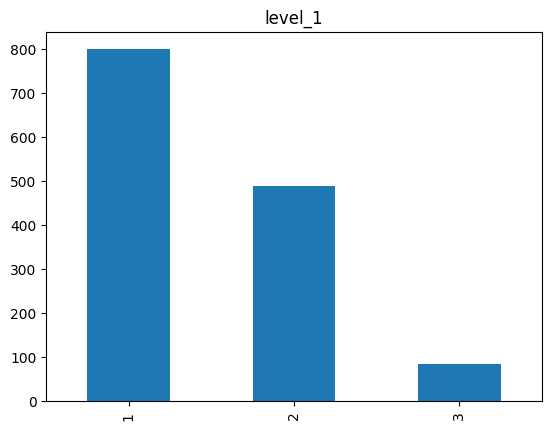

 A grant proposal has in average 1.8825674690007295 labels of level 3


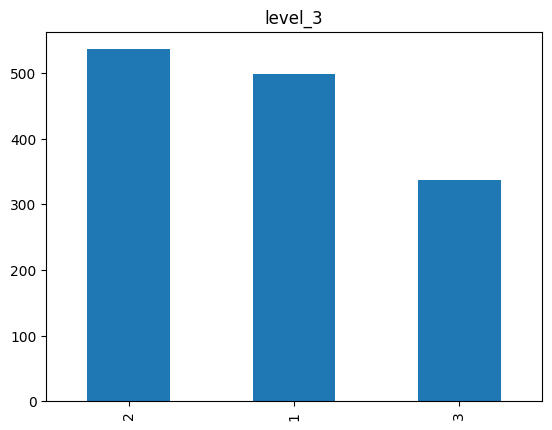

 A grant proposal has in average 2.3107221006564553 labels of level 5


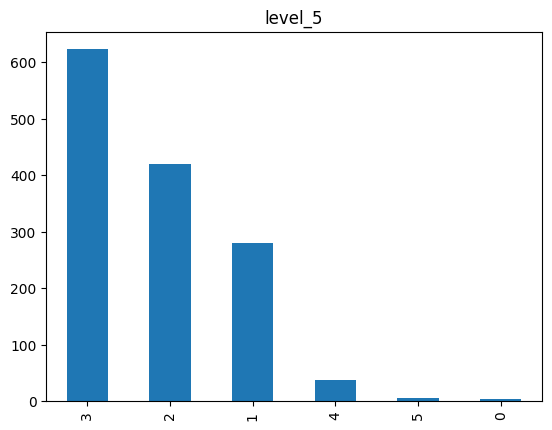

In [361]:
level_ids = pd.DataFrame()

for i, name in zip([1,3,5],['level_1','level_3','level_5']):
    temp_list = list(x.count(i) for x in level_IDs)
    level_ids[name] = temp_list
    print(f" A grant proposal has in average {level_ids[name].mean()} labels of level {i}")
    level_ids[name].value_counts().plot(kind ='bar', title= name)   
    plt.show()

In [ ]:
all_IDs = pd.DataFrame([x for item in data['Label_IDs'] for x in item], columns = ['Label_IDs'])